## Curso Python para Economistas
### Trabajo Práctico Nº 5

### Fecha de entrega:
Lunes 28/11 a las 23:59 hs

### Modalidad de entrega y trabajo
- Este TP es **individual**.
- Un repositorio **privado** debe ser creado en GitHub para el TP, y dar acceso a los 5 profesores. Los nombres de usuario son: `belenmichel`, `rbonazzola`,  `Queeno11`, `agoszulli` y `pilarch`.
- Recuerden comentar cada commit con un mensaje específico (esto es simplemente una buena práctica, pero no los evaluaremos por esto; sólo el mensaje final es obligatorio, como indica el siguiente inciso).  
- Cuando hayan hecho el último commit, copien la URL para clonar su repositorio y péguenla en [este Google Sheet](https://docs.google.com/spreadsheets/d/1byFOKyV7UnBuPuF9X2JWFVOUZX36b2_CEDw9ColP7VQ/edit?usp=sharing), en la hoja del TP5. Al ser un repositorio privado, solo los colaboradores habilitados podrán clonarlo.
- Al finalizar el trabajo práctico deben hacer un último commit y push en su repositorio de GitHub con el mensaje `"Entrega final del TP5"`. Antes de la fecha y hora de entrega pueden hacer cuantos cambios quieran en el repositorio, pero luego de la hora de corte no deben hacer más cambios. Si un commit con el mensaje anterior se realiza luego de la hora de entrega, se supondrá que la entrega tardía fue intencional y se utilizarán los días de gracia. La última versión en el repositorio es la que será evaluada.

___

## Objetivo

El objetivo de este trabajo es integrar datos de anuncios de compraventa/alquiler de Argentina, provenientes del sitio www.properati.com, con datos censales de población de los partidos de la provincia de Buenos Aires (del año 2010, ya que los del último censo no están todavía disponibles); para luego visualizarlos en mapas y gráficos. <br> 
Si les interesaría trabajar con otras provincias (en lugar de la provincia de Buenos Aires), **son bienvenidos a hacerlo**; pero, por simplicidad, las consignas se redactarán suponiendo que trabajan con partidos de la provincia de Buenos Aires.<br>

___

## Datos

En este trabajo vamos a utilizar dos nuevos conjuntos de datos, llamémoslos `propiedades` y `población_censo2010`. Además, vamos a trabajar con datos georreferenciados de provincias y departamentos/partidos, con los que ya trabajamos en la clase sincrónica 5.

#### `propiedades`
Es un archivo tabular CSV comprimido (extensión `.csv.gz`) que se pueden bajar de este [link](https://drive.google.com/file/d/1quoz5gQ1lMHAHwH5Kp19Mxy1nlZ-kf-v/view?usp=sharing) y pesa 289MB. <br>Este archivo contiene una series de registros (filas), donde cada uno corresponde a una propiedad que está en compra/venta o en alquiler en un dado período.

#### `población_censo2010`
Usar el archivo `data/poblacion_PBA.xls` (ya está en el repositorio), que contiene la población para cada partido de la provincia de Buenos Aires. Si desean trabajar con otra provincia, pueden realizar la consulta correspondiente en https://www.indec.gob.ar/indec/web/Nivel4-Tema-2-41-135.

#### `departamentos_georef` y `provincias_georef`
Estos archivos, ya conocidos de la clase 5, contienen los datos georreferenciados de los departamentos y provincias de Argentina.


___

## Consignas


1. a. **Cargar y procesar los datos de propiedades** <br>
Leer los datos de propiedades (recordar que se trata de un CSV) en un `DataFrame` llamado `propiedades_df`. Notar que los datos están comprimidos (tiene extensión `.gz`). En lugar de descomprimir el archivo en el disco, usar el argumento `compression='gzip'` en la función de lectura.
    - Examinar el número de filas y columnas del DataFrame resultante.
    - Eliminar las columnas `id`, `ad_type`, `title`, `description`, `l1`, `l4`, `l5` y `l6`.
    - Usar la columna adecuada para filtrar los registros correspondientes a la provincia de Buenos Aires (u otra provincia de Argentina o CABA si así lo desean). Para esto puede ser útil el método `unique` el cual les permitirá examinar los valores únicos correspondientes a una columna. También puede resultar útil el método `isin`. Examinar nuevamente el número de filas y columnas del DataFrame resultante.
    - Filtrar los registros que tengan datos faltantes en las columnas de precio, superficie (total y cubierta), latitud y longitud. Para eso será util el método `dropna`, y para usarlo deben prestar atención a los argumentos `axis` y `subset`. Examinar nuevamente el número de filas y columnas del DataFrame resultante.    
    - Guardar el DataFrame como csv. Esto es sólo por conveniencia, para que no tengan que leer el archivo original y preprocesarlo desde cero si necesitan reiniciar el kernel de Jupyter. En el futuro pueden leer directamente el archivo final. Como referencia, este archivo (para la provincia de Buenos Aires) debería pesar unos 23 MB. No hace falta que lo incluyan en la entrega del trabajo.

    b. **Cargar los datos de población por partido.** <br>
Deben cargar la información de población en un DataFrame usando Pandas, y producir un DataFrame final que contenga dos columnas: el nombre del partido y la población en 2010.

**Aclaración**: uso los datos de la provincia de Misiones en vez de los de Buenos Aires

In [1]:
import pandas as pd

In [2]:
PROPERATI_ORIGINAL = r"datos\ar_properties.csv.gz" # ruta al archivo original
ARCHIVO_PROPIEDADES_FILTRADO = r"datos\propiedades_mis_filtrado.csv" # ruta al archivo final

In [3]:
propiedades_df = pd.read_csv(PROPERATI_ORIGINAL, compression='gzip')

In [4]:
propiedades_df.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
1,9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
2,tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
3,Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
4,bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


In [5]:
propiedades_df.shape #25 columnas

(1000000, 25)

In [6]:
propiedades_df = propiedades_df.drop(["id", "ad_type", "title", "description", "l1", "l4", "l5", "l6"], axis=1)

In [7]:
propiedades_df.shape #17 columnas

(1000000, 17)

In [8]:
print(propiedades_df["l2"].unique())

['Bs.As. G.B.A. Zona Norte' 'Buenos Aires Costa Atlántica' 'Entre Ríos'
 'Misiones' 'Santa Fe' 'Bs.As. G.B.A. Zona Oeste' 'Tucumán' 'Chubut'
 'Capital Federal' 'Córdoba' 'Buenos Aires Interior'
 'Bs.As. G.B.A. Zona Sur' 'Canelones' 'San Luis' 'Neuquén' 'Colonia'
 'Maldonado' 'Río Negro' 'Montevideo' 'Mendoza' 'Corrientes' 'Salta'
 'La Pampa' 'Florida' 'Tierra Del Fuego' 'Chaco' 'Santa Cruz' 'Catamarca'
 'San Juan' 'Santiago Del Estero' 'Miami' 'Jujuy' 'Michigan' 'São Paulo'
 'La Rioja' 'Rocha' 'Santa Catarina' 'Pennsylvania' 'Formosa'
 'Rio Grande do Norte' 'Maryland' 'Rio de Janeiro' 'California']


In [9]:
lista = ['Misiones']
prop_mis_df = propiedades_df[propiedades_df["l2"].isin(lista)]
prop_mis_df.head()

,start_date,end_date,created_on,lat,lon,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type
3,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Misiones,Oberá,2.0,1.0,1.0,NaN,NaN,NaN,NaN,Mensual,Lote,Venta
298,2020-08-22,2020-09-04,2020-08-22,-27.473356,-55.862871,Misiones,Garupá,5.0,3.0,1.0,155.0,155.0,30000.0,USD,Mensual,Casa,Venta
799,2021-03-21,2021-06-05,2021-03-21,NaN,NaN,Misiones,San Pedro,NaN,NaN,NaN,NaN,NaN,2500000.0,USD,Mensual,Otro,Venta
1449,2020-06-09,2020-10-23,2020-06-09,NaN,NaN,Misiones,Posadas,NaN,NaN,NaN,NaN,NaN,4200000.0,ARS,NaN,Lote,Venta
1538,2020-06-09,2020-12-09,2020-06-09,-27.367439,-55.899943,Misiones,Posadas,1.0,0.0,1.0,NaN,NaN,6500.0,ARS,NaN,Oficina,Alquiler


In [10]:
print(prop_mis_df["l2"].unique()) #veo que sólo quedan observaciones de misiones
prop_mis_df.shape

['Misiones']


(4516, 17)

Filtrar los registros que tengan datos faltantes en las columnas de precio, superficie (total y cubierta), latitud y longitud. Para eso será util el método dropna, y para usarlo deben prestar atención a los argumentos axis y subset. Examinar nuevamente el número de filas y columnas del DataFrame resultante.

In [11]:
col_filtrar = ["price", "surface_total", "surface_covered", "lat", "lon"]
prop_mis_df = prop_mis_df.dropna(subset=col_filtrar, axis=0)

In [12]:
prop_mis_df.shape #veo menos filas

(530, 17)

In [13]:
prop_mis_df.to_csv(ARCHIVO_PROPIEDADES_FILTRADO, index=False)

In [14]:
#corro pip install xlrd en la consola
poblacion_df = pd.read_excel(r"datos\P1-P_Misiones.xls")

In [15]:
poblacion_df
poblacion_df = poblacion_df.drop([0,1,2,3,4,5,6,24,25,26,27], axis=0)
col = ["Unnamed: 1", "Unnamed: 3", "Unnamed: 4"]
poblacion_df=poblacion_df.drop(col, axis=1)
poblacion_df = poblacion_df.rename({"Unnamed: 2": "poblacion_2010", "Cuadro P1-P. Provincia de Misiones. Población total y variación intercensal absoluta y relativa por departamento. Años 2001-2010":"departamento"}, axis=1)
poblacion_df = poblacion_df.reset_index(drop=True)
poblacion_df

,departamento,poblacion_2010
0,Apóstoles,42249.0
1,Cainguás,53403.0
2,Candelaria,27040.0
3,Capital,324756.0
4,Concepción,9577.0
5,Eldorado,78221.0
6,General Manuel Belgrano,42902.0
7,Guaraní,67897.0
8,Iguazú,82227.0
9,Leandro N. Alem,45075.0


2. **Convertir el DataFrame de Properati en GeoDataFrame. (13 pts)** <br>
El DataFrame generado tiene dos columnas para las coordenadas de latitud y longitud del inmueble. En este ejercicio, lo convertiremos en un GeoDataFrame.
- Utilizando el método `apply`,  generar una Series cuyo contenido sean puntos de `shapely` (es decir, objetos geométricos), cada uno construido a partir de la latitud y longitud del inmueble. Para eso, definir una función auxiliar llamada `generar_geometria`, que reciba una fila del DataFrame y devuelva un `Point` (prestar atención al orden de la longitud y la latitud). Agregar esta Series como una nueva columna llamada `geometry`. Eliminar las columnas de latitud y longitud.
- Generar un GeoDataFrame a partir del DataFrame anterior. Esto se puede hacer llamando al constructor de GeoDataFrame usando el argumento `geometry` al que se le pasa el nombre de la columna que se va a usar como la geometría asociada a cada registro.

In [16]:
from shapely.geometry import Point
import geopandas as gpd

Ejemplo de cómo inicializar un punto:

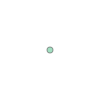

In [17]:
latitud, longitud = -34.93, -57.95
la_plata = Point(longitud, latitud)
la_plata

In [18]:
def generar_geometria(fila):
    '''
    Esta función recibe una fila del DataFrame y devuelve un Point con la latitud y longitud correspondiente
    '''
    
    return Point(fila['lon'], fila['lat'])

In [19]:
prop_mis_df['geometry']=prop_mis_df.apply(generar_geometria, axis=1)
prop_mis_df = prop_mis_df.drop(columns=['lat', 'lon'])
prop_mis_df.head(2)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,geometry
298,2020-08-22,2020-09-04,2020-08-22,Misiones,Garupá,5.0,3.0,1.0,155.0,155.0,30000.0,USD,Mensual,Casa,Venta,POINT (-55.8628707106 -27.4733555197)
7504,2020-06-07,2020-06-14,2020-06-07,Misiones,Posadas,4.0,NaN,2.0,150.0,150.0,20000.0,ARS,NaN,Casa,Alquiler,POINT (-55.88880539 -27.3754921)


In [20]:
prop_mis_gdf = gpd.GeoDataFrame(prop_mis_df, geometry='geometry')
prop_mis_gdf.head(2)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,geometry
298,2020-08-22,2020-09-04,2020-08-22,Misiones,Garupá,5.0,3.0,1.0,155.0,155.0,30000.0,USD,Mensual,Casa,Venta,POINT (-55.86287 -27.47336)
7504,2020-06-07,2020-06-14,2020-06-07,Misiones,Posadas,4.0,NaN,2.0,150.0,150.0,20000.0,ARS,NaN,Casa,Alquiler,POINT (-55.88881 -27.37549)


3. **Generar un GeoDataFrame con los partidos de Buenos Aires (7pts)**

Usando Geopandas, cargar los shapefiles de departamentos/partidos y provincias en sendos geodataframes. Repetir el procedimiento seguido en la clase sincrónica 5 para asociar los departamentos/partidos a sus respectivas provincias. Filtrar el GeoDataFrame resultante de manera de quedarse con los registros correspondientes a sólo la provincia de Buenos Aires (o la provincia que hayan elegido). Llamarlo `partidos_bsas_gdf` o `departamentos_<provincia>_gdf`.

In [21]:
PROVINCIAS = r"datos_asincronica\provincia_shp\provincia.shp" # ruta al shapefile de provincias
DEPARTAMENTOS = r"datos\departamento\departamento.shp" # ruta al shapefile de departamentos

In [22]:
provincias_gdf = gpd.read_file(filename=PROVINCIAS)
deptos_gdf = gpd.read_file(filename=DEPARTAMENTOS)

Cannot find header.dxf (GDAL_DATA is not defined)


In [23]:
provincias_gdf.head(2)

,gid,entidad,fna,gna,nam,in1,fdc,sag,geometry
0,1,0,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma,Ciudad Autónoma de Buenos Aires,02,Geografía,IGN,"POLYGON ((-58.45535 -34.52776, -58.45404 -34.5..."
1,2,0,Provincia del Neuquén,Provincia,Neuquén,58,Geografía,IGN,"POLYGON ((-70.39341 -36.15624, -70.39333 -36.1..."


In [24]:
deptos_gdf.head(2)

,gid,objectid,entidad,objeto,fna,gna,nam,sag,lima_100k_,fdc,...,escala,created_us,created_da,last_edite,last_edi_1,globalid,departamen,shape_star,shape_stle,geometry
0,2,8076.0,0,Departamento,Departamento Federal,Departamento,Federal,IGN,1.0,ATER - Direc. de Catastro,...,100000.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{46D44452-DF00-4C5F-993D-597200D9EC6B},1.0,0.492214,5.517325,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6..."
1,3,8077.0,0,Departamento,Departamento Gualeguaychú,Departamento,Gualeguaychú,IGN,1.0,ATER - Direc. de Catastro,...,100000.0,MCONTIN@,2021-07-21,MCONTIN@,2021-07-21,{DE76B04F-5049-43D1-B9BE-C600EEBF6D35},1.0,0.726805,5.330048,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0..."


In [25]:
#extraigo las columnas que me interesan (mantengo objectid porque los nombres se repiten)
deptos_gdf = deptos_gdf[["objectid", "nam", "geometry"]] 

#renombro la columna con el nombre del depto
deptos_gdf = deptos_gdf.rename({"nam": "departamento"}, axis=1)

#genero una copia para no trabajar sobre el mismo gdf
deptos_punto_adentro_gdf = deptos_gdf.copy()

#genero el punto representativo de cada depto
deptos_punto_adentro_gdf["geometry"] = deptos_gdf.geometry.representative_point();

#hago el join espacial (cada depto matchea con la provincia en donde queda contenido el punto representativo)
prov_dep_gdf = deptos_punto_adentro_gdf.sjoin(provincias_gdf, predicate="within")

In [26]:
prov_dep_gdf.head(5)

,objectid,departamento,geometry,index_right,gid,entidad,fna,gna,nam,in1,fdc,sag
0,8076.0,Federal,POINT (-58.91187 -31.02845),12,13,0,Provincia de Entre Ríos,Provincia,Entre Ríos,30,Geografía,IGN
1,8077.0,Gualeguaychú,POINT (-58.74370 -32.99769),12,13,0,Provincia de Entre Ríos,Provincia,Entre Ríos,30,Geografía,IGN
2,8078.0,Islas del Ibicuy,POINT (-58.89465 -33.59711),12,13,0,Provincia de Entre Ríos,Provincia,Entre Ríos,30,Geografía,IGN
3,8268.0,Cushamen,POINT (-70.75026 -42.47312),10,11,0,Provincia del Chubut,Provincia,Chubut,26,Geografía,IGN
4,8079.0,Victoria,POINT (-60.25788 -32.75127),12,13,0,Provincia de Entre Ríos,Provincia,Entre Ríos,30,Geografía,IGN


In [27]:
prov_dep_gdf.shape
#ahora tengo una base de deptos con la provincia correspondiente a cada uno
#nam indica el nombre de la provincia y objectid identifica a cada depto de forma única

(529, 12)

In [28]:
#ahora voy a hacer un join con el gdf original de departamentos, que tenía los polígonos originales
#para eso primero selecciono las columnas que necesito de prov_dep_gdf
prov_dep_df = prov_dep_gdf[["objectid", "nam"]]
prov_dep_df.head(5)

deptos_gdf = deptos_gdf.merge(prov_dep_df, how="inner", on="objectid")
deptos_gdf = deptos_gdf.rename({"nam": "provincia"}, axis=1)

In [29]:
deptos_gdf.head(5) #ahora cada departamento tiene asignado su polígono y el nombre de la prov. corresp. 

,objectid,departamento,geometry,provincia
0,8076.0,Federal,"POLYGON ((-58.57731 -30.69016, -58.57512 -30.6...",Entre Ríos
1,8077.0,Gualeguaychú,"POLYGON ((-58.13011 -33.02912, -58.13087 -33.0...",Entre Ríos
2,8078.0,Islas del Ibicuy,"POLYGON ((-58.57589 -34.02675, -58.57593 -34.0...",Entre Ríos
3,8268.0,Cushamen,"POLYGON ((-71.17490 -41.99995, -71.05132 -41.9...",Chubut
4,8079.0,Victoria,"POLYGON ((-59.77158 -32.58791, -59.77198 -32.5...",Entre Ríos


In [30]:
#primero chequeo cómo está escrito el nombre de la provincia
print(deptos_gdf["provincia"].unique())

#filtro los departamentos de misiones
deptos_mis_gdf = deptos_gdf[deptos_gdf.provincia == 'Misiones']
print(deptos_mis_gdf["provincia"].unique())

['Entre Ríos' 'Chubut' 'Buenos Aires' 'Salta' 'Neuquén' 'La Rioja'
 'Córdoba' 'Chaco' 'Formosa' 'Río Negro' 'Corrientes' 'San Luis'
 'San Juan' 'Catamarca' 'Santiago del Estero' 'Mendoza' 'Santa Fe'
 'Misiones' 'Jujuy' 'Santa Cruz' 'Ciudad Autónoma de Buenos Aires'
 'La Pampa' 'Tierra del Fuego, Antártida e Islas del Atlántico Sur'
 'Tucumán']
['Misiones']


In [31]:
print(deptos_mis_gdf.head(3))
print(deptos_mis_gdf.shape)

     objectid departamento                                           geometry  \
102    8227.0     Eldorado  POLYGON ((-54.14270 -26.14265, -54.16553 -26.2...   
164    8228.0    San Pedro  POLYGON ((-53.71120 -26.46677, -53.71163 -26.4...   
189    8226.0   Montecarlo  POLYGON ((-54.26378 -26.48836, -54.26377 -26.4...   

    provincia  
102  Misiones  
164  Misiones  
189  Misiones  
(17, 4)


5. **Asociar inmuebles a sus respectivos partidos mediante información georreferenciada** <br>
Notar que en el GeoDataFrame de Properati tenemos la columna `l3`, pero no es claro si esto representa una localidad o un partido. 
En este ejercicio, vamos a realizar un join espacial (`sjoin`) de `propiedades_gdf` con el `partidos_bsas_gdf` generado en el punto anterior. Luego, deben determinar para cuántos de los registros, la columna `l3` coincide con el nombre del partido proveniente de `partidos_bsas_gdf`. Dejar mencionado como comentario algunos casos que detecten en los que no coinciden estos valores. <br>
Finalmente, descartar los departamentos con menos de 10 registros (recordar `groupby(...).filter` de la clase 4).

In [32]:
prop_mis_gdf.head(3)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,geometry
298,2020-08-22,2020-09-04,2020-08-22,Misiones,Garupá,5.0,3.0,1.0,155.0,155.0,30000.0,USD,Mensual,Casa,Venta,POINT (-55.86287 -27.47336)
7504,2020-06-07,2020-06-14,2020-06-07,Misiones,Posadas,4.0,NaN,2.0,150.0,150.0,20000.0,ARS,NaN,Casa,Alquiler,POINT (-55.88881 -27.37549)
7609,2020-06-07,2020-06-23,2020-06-07,Misiones,Posadas,1.0,NaN,1.0,50.0,50.0,8000.0,ARS,NaN,Departamento,Alquiler,POINT (-55.90174 -27.35707)


In [33]:
prop_mis_gdf.shape

(530, 16)

In [34]:
#recordar que prop_mis_df ya tiene un punto generado
#join espacial (cada prop. matchea con el depto en donde queda contenido el punto)
print(prop_mis_gdf.crs) #no tiene un crs asignado. Debo asignarle el mismo que el de deptos para poder hacer el sjoin
print(deptos_mis_gdf.crs) 

None
EPSG:4326


In [35]:
#le asigno un crs
prop_mis_gdf = prop_mis_gdf.set_crs("EPSG:4326")
print(prop_mis_gdf.crs)

EPSG:4326


In [36]:
prop_deptos_joined_gdf = prop_mis_gdf.sjoin(deptos_mis_gdf, predicate="within")

In [37]:
prop_deptos_joined_gdf.head(2)

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,property_type,operation_type,geometry,index_right,objectid,departamento,provincia
298,2020-08-22,2020-09-04,2020-08-22,Misiones,Garupá,5.0,3.0,1.0,155.0,155.0,30000.0,USD,Mensual,Casa,Venta,POINT (-55.86287 -27.47336),411,8529.0,Capital,Misiones
7504,2020-06-07,2020-06-14,2020-06-07,Misiones,Posadas,4.0,NaN,2.0,150.0,150.0,20000.0,ARS,NaN,Casa,Alquiler,POINT (-55.88881 -27.37549),411,8529.0,Capital,Misiones


In [38]:
prop_deptos_joined_gdf.shape 

(530, 20)

In [39]:
#creo una columna que indica si el nombre en l3 coincide con el nombre del depto. que viene del IGN
prop_deptos_joined_gdf['nombre_coincide'] = prop_deptos_joined_gdf['l3'] == prop_deptos_joined_gdf['departamento']
prop_deptos_joined_gdf

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,...,currency,price_period,property_type,operation_type,geometry,index_right,objectid,departamento,provincia,nombre_coincide
298,2020-08-22,2020-09-04,2020-08-22,Misiones,Garupá,5.0,3.0,1.0,155.0,155.0,...,USD,Mensual,Casa,Venta,POINT (-55.86287 -27.47336),411,8529.0,Capital,Misiones,False
7504,2020-06-07,2020-06-14,2020-06-07,Misiones,Posadas,4.0,NaN,2.0,150.0,150.0,...,ARS,NaN,Casa,Alquiler,POINT (-55.88881 -27.37549),411,8529.0,Capital,Misiones,False
7609,2020-06-07,2020-06-23,2020-06-07,Misiones,Posadas,1.0,NaN,1.0,50.0,50.0,...,ARS,NaN,Departamento,Alquiler,POINT (-55.90174 -27.35707),411,8529.0,Capital,Misiones,False
8059,2020-06-07,2021-05-02,2020-06-07,Misiones,Posadas,3.0,3.0,1.0,547.0,160.0,...,USD,NaN,Casa,Venta,POINT (-55.90579 -27.37111),411,8529.0,Capital,Misiones,False
12940,2020-10-24,2021-04-09,2020-10-24,Misiones,Posadas,3.0,NaN,3.0,230.0,230.0,...,USD,NaN,Casa,Venta,POINT (-55.86354 -27.49740),411,8529.0,Capital,Misiones,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986538,2020-10-02,2020-10-03,2020-10-02,Misiones,Garupá,3.0,NaN,1.0,315.0,60.0,...,USD,Mensual,Casa,Venta,POINT (-55.86060 -27.46216),411,8529.0,Capital,Misiones,False
986558,2020-10-02,2020-10-03,2020-10-02,Misiones,Posadas,3.0,NaN,2.0,145.0,145.0,...,USD,Mensual,Casa,Venta,POINT (-55.91954 -27.35768),411,8529.0,Capital,Misiones,False
986559,2020-10-02,2020-10-03,2020-10-02,Misiones,Posadas,3.0,NaN,3.0,318.0,318.0,...,USD,Mensual,Casa,Venta,POINT (-55.88866 -27.36646),411,8529.0,Capital,Misiones,False
986560,2020-10-02,2020-10-03,2020-10-02,Misiones,Posadas,3.0,NaN,2.0,1325.0,185.0,...,USD,Mensual,Casa,Venta,POINT (-55.93630 -27.39294),411,8529.0,Capital,Misiones,False


In [40]:
#cuento los casos en los que coincide (==True)
print(prop_deptos_joined_gdf["nombre_coincide"].sum()) #puedo usar sum porque True cuenta como un 1 y False como un 0

80


In [41]:
no_coinciden = prop_deptos_joined_gdf[~prop_deptos_joined_gdf['nombre_coincide']]
print(no_coinciden[["l3", "departamento"]].head(3))
print(no_coinciden[['l3', 'departamento']].tail(3))
#           l3 departamento
#298    Garupá      Capital
#7504  Posadas      Capital
#7609  Posadas      Capital
#             l3 departamento
#986559  Posadas      Capital
#986560  Posadas      Capital
#993458   Garupá      Capital

           l3 departamento
298    Garupá      Capital
7504  Posadas      Capital
7609  Posadas      Capital
             l3 departamento
986559  Posadas      Capital
986560  Posadas      Capital
993458   Garupá      Capital


7. **Número de anuncios por partido, per cápita**. <br>
Generar un mapa de la provincia de Buenos Aires, coloreando cada partido de acuerdo al número de registros normalizado por la población del mismo (en 2010). Utilizar un widget reactivo para visualizar el mapa de acuerdo al tipo de operación: venta, alquiler o alquiler temporal. _Se evaluará la presentación del mapa_.


In [42]:
#mergeo los departamentos de misiones con los datos de población
deptos_mis_gdf = deptos_mis_gdf.merge(poblacion_df, on="departamento")
deptos_mis_gdf.head(3)

,objectid,departamento,geometry,provincia,poblacion_2010
0,8227.0,Eldorado,"POLYGON ((-54.14270 -26.14265, -54.16553 -26.2...",Misiones,78221.0
1,8228.0,San Pedro,"POLYGON ((-53.71120 -26.46677, -53.71163 -26.4...",Misiones,31051.0
2,8226.0,Montecarlo,"POLYGON ((-54.26378 -26.48836, -54.26377 -26.4...",Misiones,36745.0


In [43]:
import ipywidgets as widgets 
from ipywidgets import interact
from matplotlib import pyplot as plt

In [46]:
operacion_w = widgets.Dropdown(options=sorted(prop_deptos_joined_gdf['operation_type'].unique()))  

@interact
def mostrar_prop_por_operacion(operacion=operacion_w):
    #filtro dentro de la base de propiedades según el tipo de operaración que se haya elegido
    prop_count_local = prop_deptos_joined_gdf.query("operation_type == @operacion")
    #print(prop_count_local)
    #agrupo por depto. y cuento registros de esa operación
    prop_count_local = prop_count_local.groupby("departamento").size().reset_index(name='num_propiedades')

    #ahora mergeo la base de conteo por depto. con el gdf con todos los deptos.
    deptos_prop_gdf = deptos_mis_gdf.merge(prop_count_local, on="departamento", how="left")

    #normalizo los registros 
    deptos_prop_gdf["propiedades_pc"] = deptos_prop_gdf["num_propiedades"]/deptos_prop_gdf["poblacion_2010"]
    #print(deptos_prop_gdf)
    
    #dibujo el mapa
    deptos_prop_gdf.plot(column="propiedades_pc", 
                               cmap='coolwarm', 
                               edgecolor='black', 
                               linewidth = 0.6,
                               legend=True, 
                               legend_kwds={'label': "Nº de anuncios per cápita", 'orientation': "vertical"}, 
                               missing_kwds={'color':"#efefef"}
                        )

     #etiquetas con los nombres de los deptos.
    for idx, row in deptos_prop_gdf.iterrows():
        # Si el tipo de geometría es un polígono, se calcula el centroide para la anotación
        if isinstance(row['geometry'], Point) == False:  # Solo aplica si es un polígono
            depto = "\n".join(row['departamento'].split(maxsplit=1))
            plt.annotate(
                text=depto, 
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                horizontalalignment='center', size=6
            )
    plt.title(f"Propiedades en {operacion} por departamento de la provincia de Misiones", y=1.05, fontsize=14)
    plt.show()

interactive(children=(Dropdown(description='operacion', options=('Alquiler', 'Alquiler temporal', 'Venta'), va…